# 1. Project Talfa (Talent Fair)

This project is made for the Hacktiv8 Talent Fair Vol.3. Talfa-SF is a Sales Forecast using Sales Data provided by Kalbe. The dataset contains sales data for four products over the last few days. Participants must create a model to predict sales of these products for the next 14 days. 



# 2. Introduction

I am Monica Pratiwi and I am passionate about data analysis. I hold a Bachelor's in Geography. Finding patterns nobody else sees is challenging for me. That is why I decided to pursue a career in the data science field. I aspire to be a good analyst.

# 3. External Link

Some Data Visualization Insights are posted in [Tableau](https://public.tableau.com/app/profile/monica8479/viz/KalbeSalesDataInsights/Dashboard1).

# 4. Working Area
The task that has to be done for this data
1. Able to forecast 14 days every products and categories from Kalbe’s dataset.
2. Your working model able to reach a good Accuracy Rate.
3. Able to explain the methodology used for every step, algorithm, data manipulation, data cleansing, etc.
4. Able to provide chart or any other measureable methods to prove your inferences.

## Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
from numpy import array

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import cycle

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")



## Data Loading

In [ ]:
# Load Data and use `sheet_name=None` to read in all the sheets in the workbook at one time
kalbe = '/content/drive/MyDrive/Talent Fair/kalbe_data.xlsx'
all_df1 = pd.read_excel(kalbe, sheet_name=None)

In [ ]:
# Find what is in the data
all_df1.keys()

dict_keys(['A1', 'A2', 'B1', 'B2'])

The are 4 sheets in the kalbe dataset. Each sheet represents different product from two categories, A and B. In order to create model for each product, the data needs to be separated into four different dataframe. However, for Exploratory Data Analysis, the data will concatenated so it can be analysed thoroughly. The concatenated data is called df1 and the extracted data will be df1_a1,df1_a2,df1_b1,df1_b2, based on the product name.

In [ ]:
# join all the individual dataframes into one single dataframe (directly from Excel)
df1 = pd.concat(pd.read_excel(kalbe, sheet_name=None), ignore_index=True)

In [ ]:
# Load specific sheet
df1_a1 = pd.read_excel(kalbe, sheet_name='A1')
df1_a2 = pd.read_excel(kalbe, sheet_name='A2')
df1_b1 = pd.read_excel(kalbe, sheet_name='B1')
df1_b2 = pd.read_excel(kalbe, sheet_name='B2')
df1_a1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


Description of the label in the column

* `Day`: contained information about day on sold product.
* `Category`: contained information about product category. There are 2 categories used in this dataset, A and B.
* `Product`: contained information about product name. There are 4 products used in this dataset, A1, A2 and B1, B2.
* `Sales`: contained information about product sold

In [ ]:
# Check the information of df1_a1
df1_a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [ ]:
# Check the information of df1_a2
df1_a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [ ]:
# Check the information of df1_b1
df1_b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     90 non-null     float64
 4   Event     104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [ ]:
# Check the information of df1_b2
df1_b2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


Based on the data information, one of the four data has five columns. Two data have a lot of missing values. It is df1_b1. df1_b2 has the most missing value of 74 out of 104. Missing values will be treated in the preprocessing step. Each rows represents sales data per days. df1_b1 and df1_b2 have sales data of 104 days while df1_a1 and df1_a2 have sales data for 90 days. 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       388 non-null    int64  
 1   Category  388 non-null    object 
 2   Product   388 non-null    object 
 3   Sales     300 non-null    float64
 4   Event     104 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 15.3+ KB


In [ ]:
# Data Summary
df1.describe()

,Day,Sales,Event
count,388.000000,300.000000,104.000000
mean,49.252577,1019.853148,0.115385
std,28.469724,989.964287,0.321033
min,1.000000,10.000000,0.000000
25%,25.000000,180.675000,0.000000
50%,49.000000,1000.000000,0.000000
75%,73.000000,1246.950594,0.000000
max,104.000000,4980.657414,1.000000


Based on the data summary, the lowest sales made are 10 items and the maximum sales made are 4980 items.

## Exploratory Data Analysis

In [ ]:
# Make distribution plot (histogram and boxplot) of Product Sales based on Number of Day
fig = px.histogram(df1, x="Day", y="Sales", color="Product",
                   marginal="box", # or violin, rug
                   hover_data=df1.columns, title='Distribution Product Sales based on Number of Day')
fig.show()

In [ ]:
# Plot the Product Sales
fig = px.line(df1,x="Day",y=["Sales"],color="Product", title="Product Sales")
fig.show()

## Data Preprocessing

In [ ]:
# Add Datetime to df1_a1
df1_a1['Date'] = pd.to_datetime(df1_a1['Day'], origin='2021-12-31', unit='D')
df1_a2['Date'] = pd.to_datetime(df1_a2['Day'], origin='2021-12-31', unit='D')
df1_b1['Date'] = pd.to_datetime(df1_b1['Day'], origin='2021-12-31', unit='D')
df1_b2['Date'] = pd.to_datetime(df1_b2['Day'], origin='2021-12-31', unit='D')

In [ ]:
# Ensure the data is coverted to datetime
df1_a1.Date = pd.to_datetime(df1_a1.Date)
df1_a2.Date = pd.to_datetime(df1_a2.Date)
df1_b1.Date = pd.to_datetime(df1_b1.Date)
df1_b2.Date = pd.to_datetime(df1_b2.Date)

In [ ]:
window_size = 15
df1_b1=df1_b1.fillna(df1_b1.rolling(window_size+1, min_periods=1).mean())
df1_b2=df1_b2.fillna(df1_b2.rolling(window_size+1, min_periods=1).mean())

In [ ]:
df1_b2.dropna(axis=0, inplace=True)

In [ ]:
# b2 missing values treatment
df1_b2

,Day,Category,Product,Sales,Date
60,61,B,B2,10.000000,2022-03-02
61,62,B,B2,20.000000,2022-03-03
62,63,B,B2,40.000000,2022-03-04
63,64,B,B2,80.000000,2022-03-05
64,65,B,B2,144.000000,2022-03-06
65,66,B,B2,259.200000,2022-03-07
66,67,B,B2,300.000000,2022-03-08
67,68,B,B2,450.000000,2022-03-09
68,69,B,B2,560.000000,2022-03-10
69,70,B,B2,840.000000,2022-03-11


In [ ]:
# Make Dataset of 4 products separately
a1 = df1_a1[['Date', 'Sales']]
a2 = df1_a2[['Date', 'Sales']]
b1 = df1_b1[['Date', 'Sales']]
b2 = df1_b2[['Date', 'Sales']]

## Product A1

In [ ]:
# Check the information of the data
df1_a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Day       90 non-null     int64         
 1   Category  90 non-null     object        
 2   Product   90 non-null     object        
 3   Sales     90 non-null     float64       
 4   Date      90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.6+ KB


In [ ]:
# Set date and sales as index
sales1 = df1_a1.set_index('Date')['Sales']
sales1.head()

Date
2022-01-01    100.000000
2022-01-02    101.000000
2022-01-03    102.010000
2022-01-04    103.030100
2022-01-05    104.060401
Name: Sales, dtype: float64

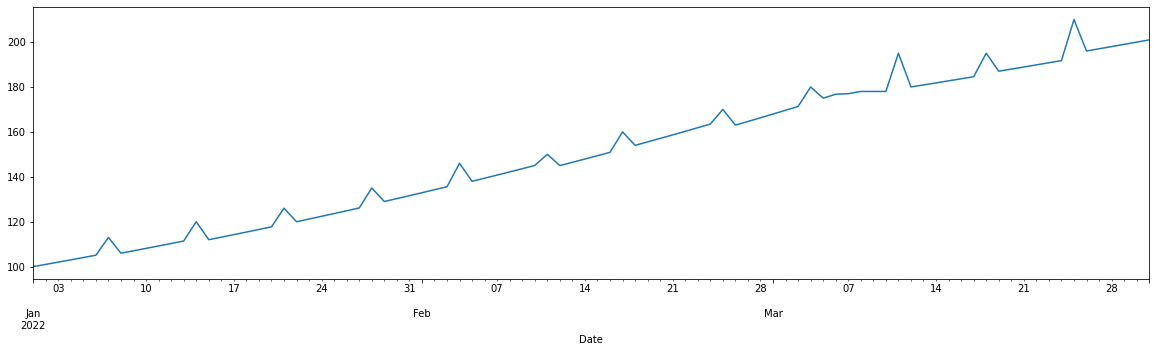

In [ ]:
# Plot Sales
sales1.plot(figsize=(20,5))

In [ ]:
# Create a window function to set the X and y
window = 2
X_a1 = []
y_a1 = []
for i in range(window,len(sales1)):
  if window+i<len(sales1):
    X_a1.append(sales1[i:window+i].values.tolist())
    try:
      y_a1.append(sales1[window+i])
    except:
      pass
  else:
    break

X_a1 = np.array(X_a1)
y_a1 = np.array(y_a1)

In [ ]:
# Set the train and test set
train_size1 = round(len(X_a1)*0.8)
X_train_a1 = X_a1[:train_size1]
y_train_a1 = y_a1[:train_size1]

X_test_a1 = X_a1[train_size1:]
y_test_a1 = y_a1[train_size1:]

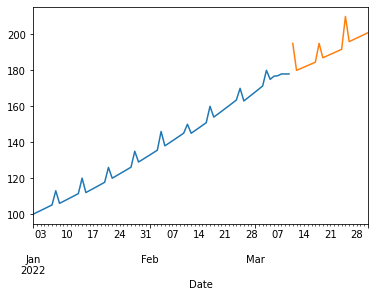

In [ ]:
# Plot the train and test data
sales1[:train_size1].plot()
sales1[train_size1:].plot()

In [ ]:
# Use MinMaxScaler for scaling
scaler1 = StandardScaler()
X_train_scaled_a1 = scaler1.fit_transform(X_train_a1)
X_test_scaled_a1 = scaler1.transform(X_test_a1)

In [ ]:
# Define, fit, and predict model
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train_scaled_a1,y_train_a1)

y_pred_train_a1 = model_lr.predict(X_train_scaled_a1)
y_pred_test_a1 = model_lr.predict(X_test_scaled_a1)

In [ ]:
# Model Evaluation
print('Train MAE:', mean_absolute_error(y_train_a1, y_pred_train_a1))
print('Test MAE:', mean_absolute_error(y_test_a1, y_pred_test_a1))
print('Train data R2 score:', r2_score(y_train_a1, y_pred_train_a1))
print('Test data R2 score:', r2_score(y_test_a1, y_pred_test_a1))

Train MAE: 2.6449948505194794
Test MAE: 2.9818841762415116
Train data R2 score: 0.9729201277783486
Test data R2 score: 0.3862251142447818


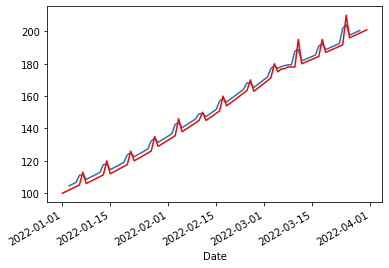

In [ ]:
# Plot the real and predicted value
plt.plot(sales1.index[window:-window],np.append(y_pred_train_a1,y_pred_test_a1))
sales1.plot(color='red')

In [ ]:
from datetime import date, timedelta as td

In [ ]:
# Forecast for the next 30 days
def forecasting(month):
  sales_forecast = sales1.copy()
  window=2
  for i in range(month):
    X = sales_forecast[-window:].values.reshape(1,-1)
    X_scaled = scaler1.transform(X)
    new_idx = datetime(sales_forecast.index.year[-1],sales_forecast.index.month[-1]+1,1)
    sales_forecast[new_idx] = round(model_lr.predict(X_scaled)[0])
  return sales_forecast

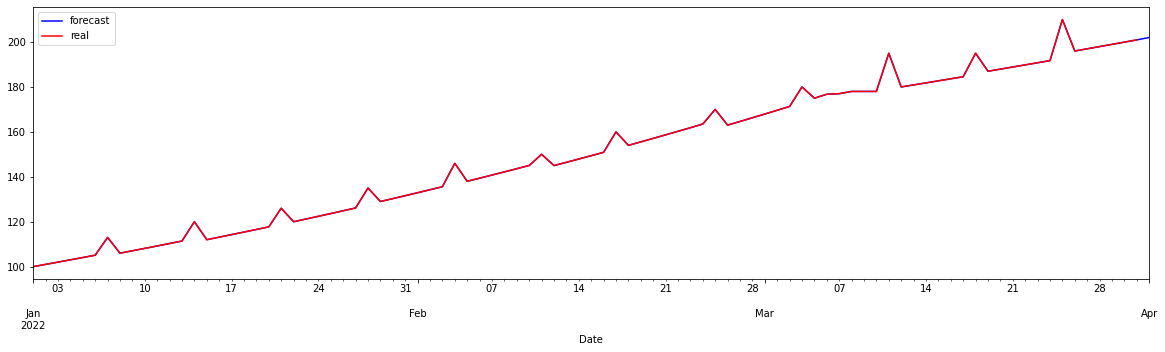

In [ ]:
# Forecast
sales_forecast = forecasting(1)
sales_forecast.plot(color='blue',label='forecast',figsize=(20,5))
sales1.plot(color='red',label='real')
plt.legend()

## Product A2

In [ ]:
# Set date and sales as index
sales2 = df1_a2.set_index('Date')['Sales']

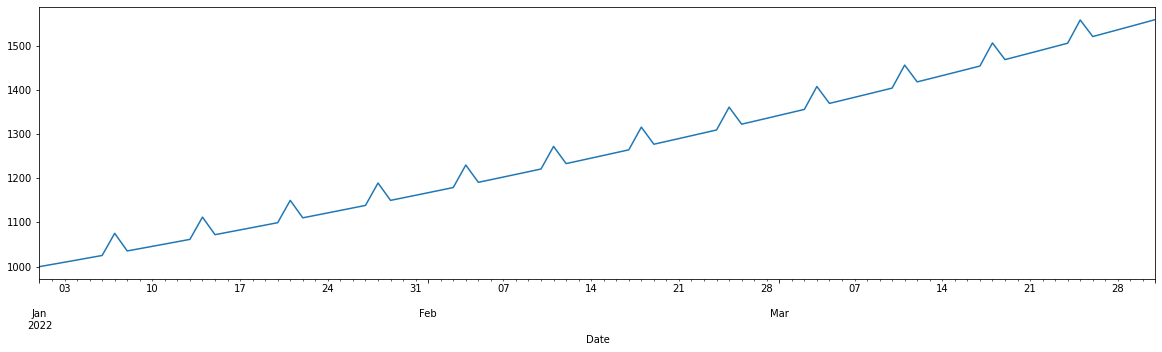

In [ ]:
# Plot Sales
sales2.plot(figsize=(20,5))

In [ ]:
# Create a window function to set the X and y
window = 2
X_a2 = []
y_a2 = []
for i in range(window,len(sales2)):
  if window+i<len(sales2):
    X_a2.append(sales2[i:window+i].values.tolist())
    try:
      y_a2.append(sales2[window+i])
    except:
      pass
  else:
    break

X_a2 = np.array(X_a2)
y_a2 = np.array(y_a2)

In [ ]:
# Set the train and test set
train_size2 = round(len(X_a2)*0.8)
X_train_a2 = X_a2[:train_size2]
y_train_a2 = y_a2[:train_size2]

X_test_a2 = X_a2[train_size2:]
y_test_a2 = y_a2[train_size2:]

In [ ]:
print('X_train: ', X_train_a2.shape)
print('X_test: ', X_test_a2.shape)

X_train:  (69, 2)
X_test:  (17, 2)


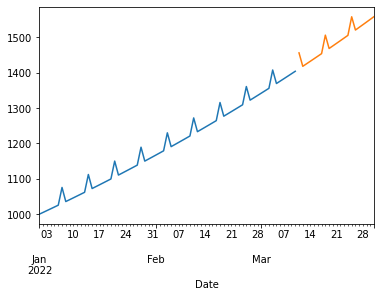

In [ ]:
# Plot the train and test data
sales2[:train_size2].plot()
sales2[train_size2:].plot()

In [ ]:
# Use MinMaxScaler for scaling
scaler1 = StandardScaler()
X_train_scaled_a2 = scaler1.fit_transform(X_train_a2)
X_test_scaled_a2 = scaler1.transform(X_test_a2)

In [ ]:
# Define, fit, and predict model
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train_scaled_a2,y_train_a2)

y_pred_train_a2 = model_lr.predict(X_train_scaled_a2)
y_pred_test_a2 = model_lr.predict(X_test_scaled_a2)

In [ ]:
# Model Evaluation
print('Train MAE:',mean_absolute_error(y_train_a2,y_pred_train_a2))
print('Test MAE:',mean_absolute_error(y_test_a2,y_pred_test_a2))
print('Train data R2 score:', r2_score(y_train_a2, y_pred_train_a2))
print('Test data R2 score:', r2_score(y_test_a2, y_pred_test_a2))

Train MAE: 13.800239285734012
Test MAE: 12.655515727660982
Train data R2 score: 0.9701892137039807
Test data R2 score: 0.7409216275442354


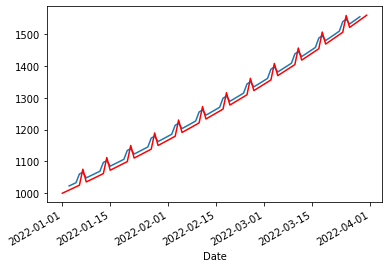

In [ ]:
# Plot the real and predicted value
plt.plot(sales2.index[window:-window],np.append(y_pred_train_a2,y_pred_test_a2))
sales2.plot(color='red')

In [ ]:
# Forecast
def forecasting(month):
  sales_forecast = sales2.copy()
  window=2
  for i in range(month):
    X = sales_forecast[-window:].values.reshape(1,-1)
    X_scaled = scaler1.transform(X)
    new_idx = datetime(sales_forecast.index.year[-1],sales_forecast.index.month[-1]+1,1)
    sales_forecast[new_idx] = round(model_lr.predict(X_scaled)[0])
  return sales_forecast

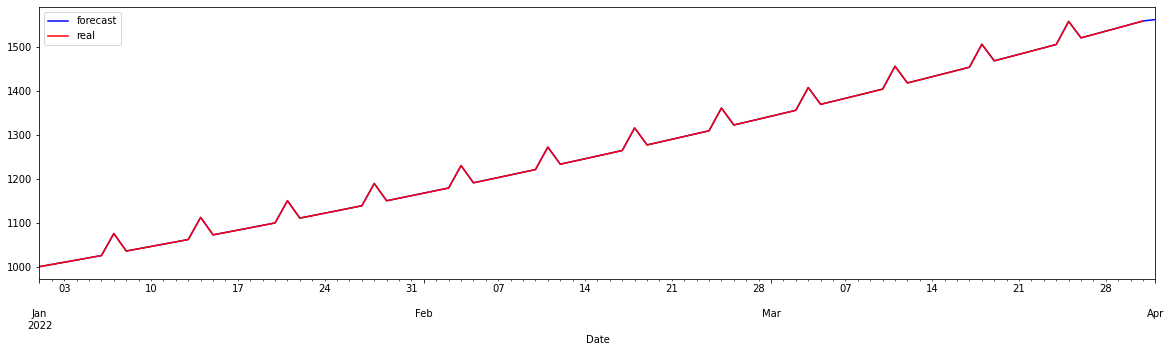

In [ ]:
# Plot the forecast
sales_forecast = forecasting(1)
sales_forecast.plot(color='blue',label='forecast',figsize=(20,5))
sales2.plot(color='red',label='real')
plt.legend()

## Product B1

In [ ]:
# Dataset Preview
df1_b1.tail()

,Day,Category,Product,Sales,Event,Date
99,100,B,B1,1077.500000,0,2022-04-10
100,101,B,B1,1097.000000,1,2022-04-11
101,102,B,B1,1118.750000,0,2022-04-12
102,103,B,B1,1151.666667,0,2022-04-13
103,104,B,B1,1000.000000,0,2022-04-14


In [ ]:
del b1['Date'] # Remove Column `Date` from b1 so there will be `Sales` only 
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled = scaler.fit_transform(np.array(b1).reshape(-1,1))
print(scaled.shape)

(104, 1)


In [ ]:
# Split Data
training_size = int(len(scaled)*0.80)
test_size = len(scaled)-training_size
train_data, test_data = scaled[0:training_size,:],scaled[training_size:len(scaled),:1]
print('train_data: ', train_data.shape)
print('test_data: ', test_data.shape)

train_data:  (83, 1)
test_data:  (21, 1)


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 14
X_train_b1, y_train_b1 = create_dataset(train_data, time_step)
X_test_b1, y_test_b1 = create_dataset(test_data, time_step)

print("X_train: ", X_train_b1.shape)
print("y_train: ", y_train_b1.shape)
print("X_test: ", X_test_b1.shape)
print("y_test", y_test_b1.shape)

X_train:  (68, 14)
y_train:  (68,)
X_test:  (6, 14)
y_test (6,)


In [ ]:
model_rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
model_rfr.fit(X_train_b1,y_train_b1)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred_train3 = model_rfr.predict(X_train_b1)
y_pred_test3 = model_rfr.predict(X_test_b1)

y_pred_train3 = y_pred_train3.reshape(-1,1)
y_pred_test3 = y_pred_test3.reshape(-1,1)

print("Train data prediction:", y_pred_train3.shape)
print("Test data prediction:", y_pred_test3.shape)

In [ ]:
# Transform back to original form

y_pred_train3 = scaler.inverse_transform(y_pred_train3)
y_pred_test3 = scaler.inverse_transform(y_pred_test3)
y_train_b1 = scaler.inverse_transform(y_train_b1.reshape(-1,1)) 
y_test_b1 = scaler.inverse_transform(y_test_b1.reshape(-1,1))

In [ ]:
# Model Evaluation
print('Train MAE:',mean_absolute_error(y_train_b1,y_pred_train3))
print('Test MAE:',mean_absolute_error(y_test_b1,y_pred_test3))
print('Train data R2 score:', r2_score(y_train_b1, y_pred_train3))
print('Test data R2 score:', r2_score(y_test_b1, y_pred_test3))

Train MAE: 54.311323529411716
Test MAE: 39.68718253968257
Train data R2 score: 0.8316498867897795
Test data R2 score: -1.3860687999513077


In [ ]:
# shift train predictions for plotting

look_back=time_step
y_pred_train3_plot = np.empty_like(scaled)
y_pred_train3_plot[:, :] = np.nan
y_pred_train3_plot[look_back:len(y_pred_train3)+look_back, :] = y_pred_train3
print("Train predicted data: ", y_pred_train3_plot.shape)

# shift test predictions for plotting
y_pred_test3_plot = np.empty_like(scaled)
y_pred_test3_plot[:, :] = np.nan
y_pred_test3_plot[len(y_pred_train3)+(look_back*2)+1:len(scaled)-1, :] = y_pred_test3
print("Test predicted data: ", y_pred_test3_plot.shape)

names = cycle(['Sales','Train predicted Sales','Test predicted Sales'])


plotdf = pd.DataFrame({'date': df1_b1['Date'],
                       'sales': df1_b1['Sales'],
                      'train_predicted_sales': y_pred_train3_plot.reshape(1,-1)[0].tolist(),
                      'test_predicted_sales': y_pred_test3_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['sales'],plotdf['train_predicted_sales'],
                                          plotdf['test_predicted_sales']],
              labels={'value':'Sales','date': 'Date'})
fig.update_layout(title_text='Comparison between Real Sales and Predicted Sales of Product B1',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Sales')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (104, 1)
Test predicted data:  (104, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()



lst_output=[]
n_steps=time_step
i=0
pred_days = 14
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = model_rfr.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model_rfr.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  14


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)

In [ ]:
# Plotting Comparison Between Last 15 Days vs Next 10 Days
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(scaled[len(scaled)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 Days Sales','Predicted Next 14 Days Sales'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Sales','index': 'Timestamp'})
fig.update_layout(title_text='Comparison Between Last 15 Days vs Next 14 Days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Sales')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# Plotting Sales and with 14 days forecast
rfrdf=scaled.tolist()
rfrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmgrudf=scaler.inverse_transform(rfrdf).reshape(1,-1).tolist()[0]

names = cycle(['Sales'])

fig = px.line(rfrdf,labels={'value': 'Sales','index': 'Timestamp'})
fig.update_layout(title_text='Combination Sales and Forecast',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Sales')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Produk B2

In [ ]:
del b2['Date']
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(np.array(b2).reshape(-1,1))
print(scaled.shape)

(44, 1)


In [ ]:
training_size = int(len(scaled)*0.80)
test_size = len(scaled)-training_size
train_data, test_data = scaled[0:training_size,:],scaled[training_size:len(scaled),:1]
print('train_data: ', train_data.shape)
print('test_data: ', test_data.shape)

train_data:  (35, 1)
test_data:  (9, 1)


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train_b2, y_train_b2 = create_dataset(train_data, time_step)
X_test_b2, y_test_b2 = create_dataset(test_data, time_step)

print("X_train: ", X_train_b2.shape)
print("y_train: ", y_train_b2.shape)
print("X_test: ", X_test_b2.shape)
print("y_test", y_test_b2.shape)

X_train:  (30, 4)
y_train:  (30,)
X_test:  (4, 4)
y_test (4,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_b2 = X_train_b2.reshape(X_train_b2.shape[0],X_train_b2.shape[1] , 1)
X_test_b2 = X_test_b2.reshape(X_test_b2.shape[0],X_test_b2.shape[1] , 1)

print("X_train: ", X_train_b2.shape)
print("X_test: ", X_test_b2.shape)

X_train:  (30, 4, 1)
X_test:  (4, 4, 1)


In [ ]:
# Build LSTM Model
model4 = Sequential()
model4.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model4.add(LSTM(32,return_sequences=True))
model4.add(LSTM(32))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 32)             4352      
                                                                 
 lstm_4 (LSTM)               (None, 4, 32)             8320      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Training

model4.fit(X_train_b2, y_train_b2, epochs=200, batch_size=1, verbose=1, shuffle=False)

In [ ]:
y_pred_train4 = model4.predict(X_train_b2, batch_size=1)
y_pred_test4 = model4.predict(X_test_b2, batch_size=1)


4/4 [==============================] - 0s 4ms/step


In [ ]:
# Transform back to original form

y_pred_train4 = scaler.inverse_transform(y_pred_train4)
y_pred_test4 = scaler.inverse_transform(y_pred_test4)
y_train_b2 = scaler.inverse_transform(y_train_b2.reshape(-1,1)) 
y_test_b2 = scaler.inverse_transform(y_test_b2.reshape(-1,1))

In [ ]:
# Model Evaluation
print('Train MAE:',mean_absolute_error(y_train_b2,y_pred_train4))
print('Test MAE:',mean_absolute_error(y_test_b2,y_pred_test4))

Train MAE: 124.96924915854812
Test MAE: 4.466655949363712


In [ ]:
# shift train predictions for plotting

look_back=time_step
y_pred_train4_plot = np.empty_like(scaled)
y_pred_train4_plot[:, :] = np.nan
y_pred_train4_plot[look_back:len(y_pred_train4)+look_back, :] = y_pred_train4
print("Train predicted data: ", y_pred_train4_plot.shape)

# shift test predictions for plotting
y_pred_test4_plot = np.empty_like(scaled)
y_pred_test4_plot[:, :] = np.nan
y_pred_test4_plot[len(y_pred_train4)+(look_back*2)+1:len(scaled)-1, :] = y_pred_test4
print("Test predicted data: ", y_pred_test4_plot.shape)

names = cycle(['Sales','Train predicted Sales','Test predicted Sales'])


plotdf = pd.DataFrame({'date': df1_b2['Date'],
                       'sales': df1_b2['Sales'],
                      'train_predicted_sales': y_pred_train4_plot.reshape(1,-1)[0].tolist(),
                      'test_predicted_sales': y_pred_test4_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['sales'],plotdf['train_predicted_sales'],
                                          plotdf['test_predicted_sales']],
              labels={'value':'Sales','date': 'Date'})
fig.update_layout(title_text='Comparison between Real Sales and Predicted Sales of Product B2',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Sales')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (44, 1)
Test predicted data:  (44, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=time_step
i=0
pred_days = 14
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model4.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model4.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  14


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[1 2 3 4]
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(scaled[len(scaled)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 4 days Sales','Predicted next 14 days Sales'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Sales','index': 'Timestamp'})
fig.update_layout(title_text='Comparison last 4 days and next 14 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Sales')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=scaled.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Sales'])

fig = px.line(lstmdf,labels={'value': 'Sales','index': 'Timestamp'})
fig.update_layout(title_text='Whole Sales and 14 Days Forecast',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Sales')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# 5. Conclusion / Overall Analysis

There are two different types of models because one type of model can be used to predict sales in several months while the other model is used to predict in units of days. There are advantages and disadvantages of each. In the prediction model in months, data is separated into train and test from the start before being fitted with a scaler at the preprocessing stage. The drawback is that the modeling process does not predict the next few days, but months. Meanwhile, other models perform feature scaling from the start, and divide the data into train and train tests.